# 1. Perkenalan

=================================================

Project 2

Nama  : Adhi Rizqi Alfaqih



=================================================

# 2. Data Loading

In [128]:
!pip install pandas
import numpy as np
# scipy.stats berfungsi untuk menyediakan alat untuk analisis statistik
import scipy.stats as stats
# untuk menjalankan fungsi pearsonr sebagai bentuk korelasi.
from scipy.stats import pearsonr
import pandas as pd

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [132]:
from sklearn.linear_model import LinearRegression

In [133]:
from sklearn.metrics import mean_absolute_error, r2_score

In [134]:
df = pd.read_csv("car_prices.csv")

In [135]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [136]:
# untuk mengetahui Jumlah Baris dan Kolom
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (558837, 16)


In [137]:
# untuk mengecek berapa banyak 'missing values' di tiap kolom

df.isna().sum().sort_values(ascending=False)

transmission    65352
body            13195
condition       11820
trim            10651
model           10399
make            10301
color             749
interior          749
odometer           94
mmr                38
sellingprice       12
saledate           12
vin                 4
year                0
state               0
seller              0
dtype: int64

In [138]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

year             0.000000
make             1.843292
model            1.860829
trim             1.905922
body             2.361154
transmission    11.694287
vin              0.000716
state            0.000000
condition        2.115107
odometer         0.016821
color            0.134028
interior         0.134028
seller           0.000000
mmr              0.006800
sellingprice     0.002147
saledate         0.002147
dtype: float64

In [139]:
# untuk menampilkan tipe data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [140]:
# deskriptif analisis ke semua kolom
descriptive_stats = df.describe(include='all')
descriptive_stats

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


In [141]:
# Mengecek Value yang unik tiap kolom
unique_values = {col: df[col].nunique() for col in df.select_dtypes(include=['object']).columns}
unique_values

{'make': 96,
 'model': 973,
 'trim': 1963,
 'body': 87,
 'transmission': 4,
 'vin': 550297,
 'state': 64,
 'color': 46,
 'interior': 17,
 'seller': 14263,
 'saledate': 3766}

In [142]:
# Mengecek baris terdapat duplikat atau tidak
duplicated_rows = df.duplicated().sum()
duplicated_rows

0

# 3. Data Cleaning

In [143]:
# inputasi misisng values dapa tipe data yang str
df['transmission']=df['transmission'].fillna(df['transmission'].mode()[0]) #karena transmission berisikan kategori, pilihannya antara automatic atau manual, jadi menggunakan mode
df['body']=df['body'].fillna(value='No_Value')
df['trim']=df['trim'].fillna(value='No_Value')
df['model']=df['model'].fillna(value='No_Value')
df['color']=df['color'].fillna(value='No_Value')
df['interior']=df['interior'].fillna(value='No_Value')
df['vin']=df['vin'].fillna(value='No_Value')
df['make']=df['make'].fillna(value='No_Value')

In [144]:
# inputasi misisng values dapa tipe data yang nnumeric
df['condition']=df['condition'].fillna(df['condition'].median())
df['odometer']=df['odometer'].fillna(df['odometer'].median())
df['mmr']=df['mmr'].fillna(df['mmr'].median)
df['sellingprice']=df['sellingprice'].fillna(df['sellingprice'].mean())

In [172]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce')
df = df.dropna(subset=['saledate'])
df['saledate'].fillna(pd.Timestamp('2014-01-01'), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_3020\4213249213.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['saledate'].fillna(pd.Timestamp('2014-01-01'), inplace=True)


In [173]:
df.isna().sum().sort_values(ascending=False)

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [147]:
df['make']=df['make'].str.upper()
df['model']=df['model'].str.upper()


In [148]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,KIA,SORENTO,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 12:30:00+08:00
1,2015,KIA,SORENTO,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 12:30:00+08:00
2,2014,BMW,3 SERIES,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-15 04:30:00+08:00
3,2015,VOLVO,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-29 04:30:00+08:00
4,2014,BMW,6 SERIES GRAN COUPE,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,2014-12-18 12:30:00+08:00


In [149]:
df['make'].unique()

array(['KIA', 'BMW', 'VOLVO', 'NISSAN', 'CHEVROLET', 'AUDI', 'FORD',
       'HYUNDAI', 'BUICK', 'CADILLAC', 'ACURA', 'LEXUS', 'INFINITI',
       'JEEP', 'MERCEDES-BENZ', 'MITSUBISHI', 'MAZDA', 'MINI',
       'LAND ROVER', 'LINCOLN', 'JAGUAR', 'VOLKSWAGEN', 'TOYOTA',
       'SUBARU', 'SCION', 'PORSCHE', 'NO_VALUE', 'DODGE', 'FIAT',
       'CHRYSLER', 'FERRARI', 'HONDA', 'GMC', 'RAM', 'SMART', 'BENTLEY',
       'PONTIAC', 'SATURN', 'MASERATI', 'MERCURY', 'HUMMER', 'LANDROVER',
       'MERCEDES', 'GMC TRUCK', 'SAAB', 'SUZUKI', 'OLDSMOBILE', 'ISUZU',
       'DODGE TK', 'GEO', 'ROLLS-ROYCE', 'MAZDA TK', 'HYUNDAI TK',
       'MERCEDES-B', 'VW', 'DAEWOO', 'CHEV TRUCK', 'FORD TK', 'PLYMOUTH',
       'FORD TRUCK', 'TESLA', 'AIRSTREAM', 'DOT', 'ASTON MARTIN',
       'FISKER', 'LAMBORGHINI', 'LOTUS'], dtype=object)

In [174]:
df['saledate'].dtype

datetime64[ns, tzoffset('PST', 28800)]

# 4. Bussiness Understanding

## 4.1 Konteks Bisnis

### Latar Belakang

Dalam industri otomotif, harga mobil merupakan salah satu faktor kunci yang mempengaruhi keputusan pembelian konsumen. Dengan banyaknya merek, model, dan fitur yang tersedia, konsumen sering kali merasa kesulitan untuk menentukan harga yang wajar untuk mobil yang mereka inginkan. Selain itu, dealer mobil juga perlu memahami dinamika pasar untuk menetapkan harga yang kompetitif dan menarik bagi pelanggan. Dataset 'car_prices.csv' berisi informasi penting mengenai harga mobil, termasuk berbagai atribut seperti merek, model, tahun, dan fitur lainnya. Dengan menganalisis dataset ini, kita dapat mengidentifikasi faktor-faktor yang mempengaruhi harga mobil dan memberikan wawasan yang berguna bagi konsumen dan dealer.

### Tujuan


- Menganalisis Faktor-faktor yang Mempengaruhi Harga Mobil: Mengidentifikasi dan menganalisis atribut-atribut yang berkontribusi terhadap variasi harga mobil dalam dataset.
- Memberikan Rekomendasi: Menyediakan rekomendasi bagi dealer mobil dan konsumen mengenai strategi penetapan harga dan pemilihan mobil berdasarkan analisis yang dilakukan.


### Problem yang ingin diangkat

Bagaimana faktor-faktor tertentu, seperti merek, model, tahun, dan fitur mobil, mempengaruhi harga jual mobil di pasar? Dengan menjawab pertanyaan ini, kita dapat memberikan wawasan yang lebih dalam tentang dinamika harga mobil dan membantu konsumen serta dealer dalam pengambilan keputusan.

### Report ini ditujukan untuk:


- Dealer Mobil: Mereka yang terlibat dalam penjualan mobil dan perlu memahami faktor-faktor yang mempengaruhi harga untuk menetapkan harga yang kompetitif.
- Konsumen: Pembeli potensial yang ingin mendapatkan informasi yang akurat mengenai harga mobil dan faktor-faktor yang mempengaruhinya sebelum melakukan pembelian.
- Peneliti dan Akademisi: Individu yang tertarik dalam analisis data dan penelitian di bidang otomotif, yang dapat menggunakan temuan dari report ini untuk studi lebih lanjut.
- Pihak Terkait dalam Industri Otomotif: Termasuk analis pasar dan pengambil keputusan yang ingin memahami tren harga dan perilaku konsumen dalam pasar otomotif.


## 4.2 Analisis SMART

### Spesifik

Kami ingin menganalisis faktor-faktor yang mempengaruhi harga mobil dalam dataset car_prices.csv, yang mencakup informasi tentang merek, model, tahun, dan fitur mobil.

### Measurable

Kami akan mengukur perbedaan rata-rata harga mobil terhadap setiap fiturnya, kami batasi terkhusus untuk bertransmisi automatic dan manual.

### Achievable

Dengan menggunakan dataset yang tersedia, kami akan mengetahui harga rata-rata dari mobil bertransmisi automatic dan manual.

### Relevant

Analisis ini relevan untuk dealer mobil dan pembeli yang ingin memahami harga pasar dan faktor-faktor yang mempengaruhi harga mobil

### Time-bound

Kami akan menyelesaikan analisis dan presentasi hasil dalam waktu 4 minggu dari sekarang

### Rangkuman

Berdasarkan dataset car_prices.csv, kami ingin menganalisis faktor-faktor yang mempengaruhi harga mobil. Kami akan membangun model rata-rata penjualan dari mobil bertransmisi autimatic ataupun manual. Proyek ini akan diselesaikan dalam waktu 4 minggu dan hasilnya akan memberikan wawasan yang relevan bagi dealer dan pembeli mobil.

## 4.3 Penjabaran Masalah dengan Metode 5W+1H

### What (Apa)

 Key Question 1 : 
 Distribusi harga mobil dalam dataset?


Penjelasan : 

Kita akan mengukur distribusi penjualan mobil. Kita akan mengacu pada data 'sellingprice' untuk mengetahui harga, lalu kita sandingkan dengan 'count' untuk menghitung frekuensi pembelian.

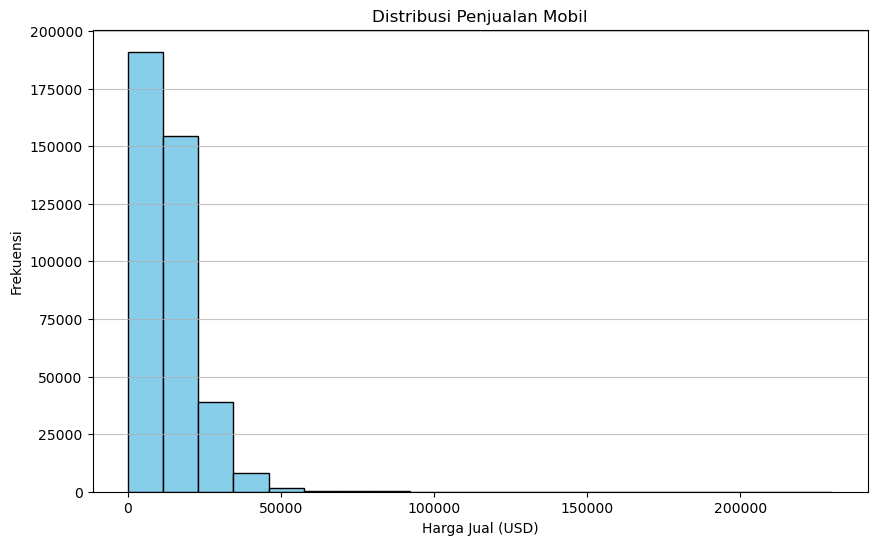

In [177]:
# Membuat Histogram Distribusi Penjualan Mobil
plt.figure(figsize=(10, 6))
plt.hist(df['sellingprice'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribusi Penjualan Mobil')
plt.xlabel('Harga Jual (USD)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

Insight :
- Histogram menunjukkan distribusi yang sangat miring ke kiri (left-skewed). Sebagian besar penjualan mobil terfokus pada harga yang lebih rendah, dengan frekuensi yang menurun secara signifikan untuk harga yang lebih tinggi.
- Sebagian besar mobil terjual dengan harga di bawah $50,000. Ini menunjukkan bahwa pasar mobil didominasi oleh mobil dengan harga lebih terjangkau, yang mungkin mencerminkan preferensi konsumen untuk kendaraan yang lebih ekonomis.
- Pemasaran untuk mobil dengan harga lebih rendah mungkin lebih efektif, sementara mobil dengan harga tinggi mungkin memerlukan strategi pemasaran yang berbeda untuk menarik pembeli.


### Who (Siapa)

Key Question 2 : 
Merk mobil yang paling sering dibeli?

Penjelasan : 
Setelah mengetahui distribusi penjualan mobil, perlu bagi konsumen untuk mengetahui referensi merk mobil yang paling banyak dibeli itu merk apa.


In [153]:
# Menghitung jumlah mobil terjual per merek
brand_counts = df['make'].value_counts()
brand_counts

make
FORD         93996
CHEVROLET    60587
NISSAN       54017
TOYOTA       39966
DODGE        30953
             ...  
FORD TK          1
MAZDA TK         1
AIRSTREAM        1
DOT              1
LOTUS            1
Name: count, Length: 67, dtype: int64

In [154]:
# Menampilkan 10 merek dengan jumlah terbanyak
top_brands = brand_counts.head(10)
top_brands

make
FORD         93996
CHEVROLET    60587
NISSAN       54017
TOYOTA       39966
DODGE        30953
HONDA        27351
HYUNDAI      21831
BMW          20793
KIA          18082
CHRYSLER     17483
Name: count, dtype: int64

C:\Users\User\AppData\Local\Temp\ipykernel_3020\3258212454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')


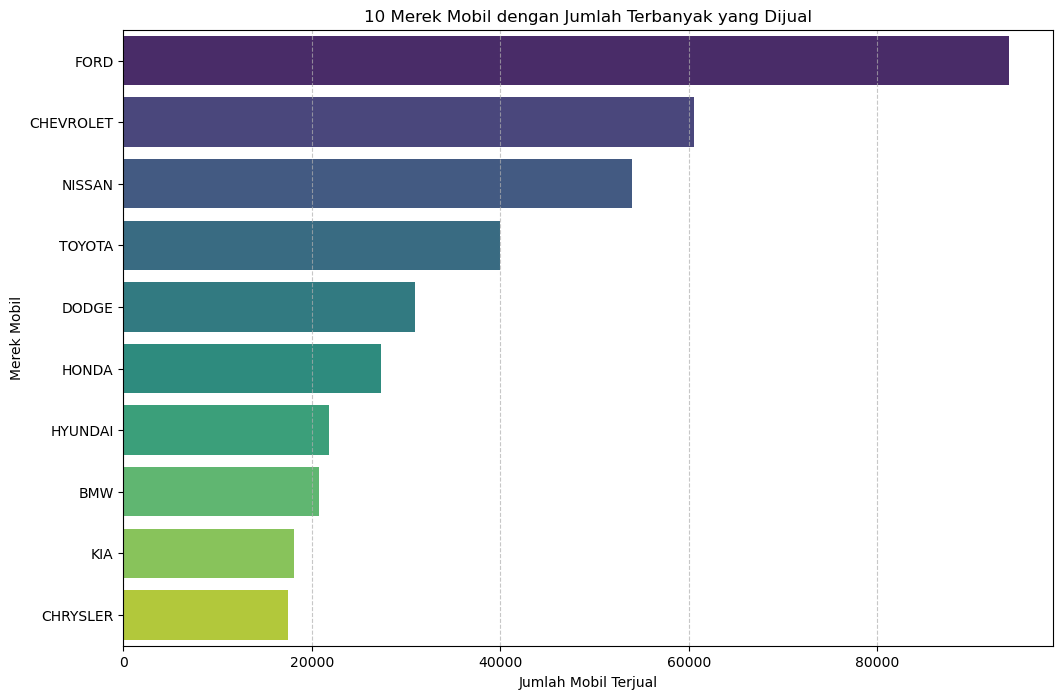

In [155]:
# Membuat visualisasi dengan bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='viridis')
plt.title('10 Merek Mobil dengan Jumlah Terbanyak yang Dijual')
plt.xlabel('Jumlah Mobil Terjual')
plt.ylabel('Merek Mobil')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [156]:
print("\nInsight:")
print("Merek mobil dengan jumlah terbanyak yang dijual adalah", top_brands.index[0], "dengan", top_brands.values[0], "unit.")
print("Merek mobil dengan jumlah terendah dalam top 10 adalah", top_brands.index[-1], "dengan", top_brands.values[-1], "unit.")


Insight:
Merek mobil dengan jumlah terbanyak yang dijual adalah FORD dengan 93996 unit.
Merek mobil dengan jumlah terendah dalam top 10 adalah CHRYSLER dengan 17483 unit.


Insight :
- Merek Ford dan Chevrolet menunjukkan jumlah penjualan yang sangat tinggi dibandingkan dengan merek lainnya. Ini menunjukkan bahwa kedua merek ini memiliki daya tarik yang kuat di pasar.
- Merek seperti Chrysler dan Kia berada di bagian bawah daftar, menunjukkan bahwa mereka mungkin menghadapi tantangan dalam menarik pelanggan dibandingkan dengan merek yang lebih populer.


### When (Kapan)

Key Question 3 : Trend rata-rata harga jual per tahun?

Penjelasan : Hal ini membantu untuk konsumen / produsen untuk mengetahui fluktuasi harga mobil yang berubah-ubah tiap tahunnya.

In [ ]:
# membuat harga rata-rata per tahun.
average_price_per_year = df.groupby(df['year'])['sellingprice'].mean().reset_index()


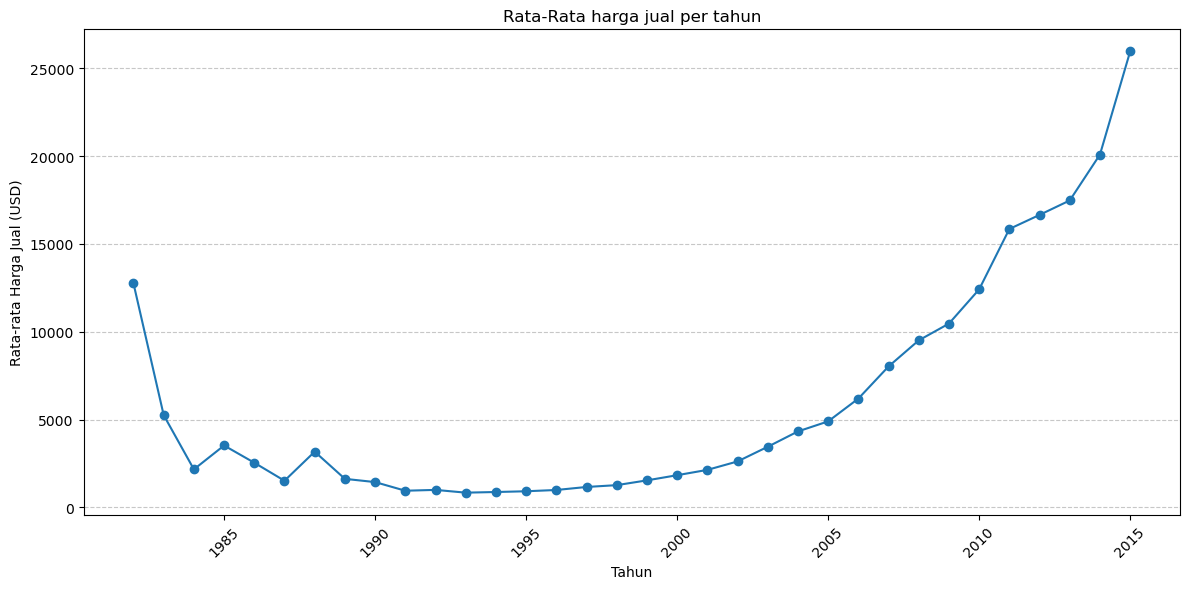

In [ ]:
# membuat diagram
plt.figure(figsize=(12, 6))
plt.plot(average_price_per_year['year'], average_price_per_year['sellingprice'], marker='o', linestyle='-')
plt.title('Rata-Rata harga jual per tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata Harga Jual (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

Insight :
- Pada awal periode (sekitar tahun 1985), terdapat penurunan harga yang signifikan. Hal ini mungkin disebabkan oleh berbagai faktor, seperti perubahan dalam permintaan pasar, inovasi teknologi, atau krisis ekonomi.
- Dari tahun 1990 hingga 2005, harga tampak relatif stabil dengan sedikit fluktuasi. Ini menunjukkan bahwa pasar mobil mungkin telah mencapai keseimbangan antara penawaran dan permintaan.
- Setelah tahun 2005, terdapat lonjakan yang tajam dalam rata-rata harga jual. Ini bisa disebabkan oleh beberapa faktor seperti inovasi teknologi, permintaan yang meningkat, dan inflasi.
- Jika tren ini berlanjut, kita dapat mengharapkan harga mobil untuk terus meningkat di masa depan, yang dapat mempengaruhi keputusan pembelian konsumen dan strategi pemasaran dealer.

### Where (Dimana)

Key Question 4 : Dimana lokasi yang paling banyak membeli mobil?


Penjelasan : Perlu untuk mengetahui, seller mana dengan penjualan terbanyak. Bisa untuk referensi konsumen / dealer lainnya.

In [ ]:
# menghitung value seller
seller_counts = df['seller'].value_counts()

In [ ]:
# filtering 10 terbanyak
top_10_sellers = seller_counts.head(10)

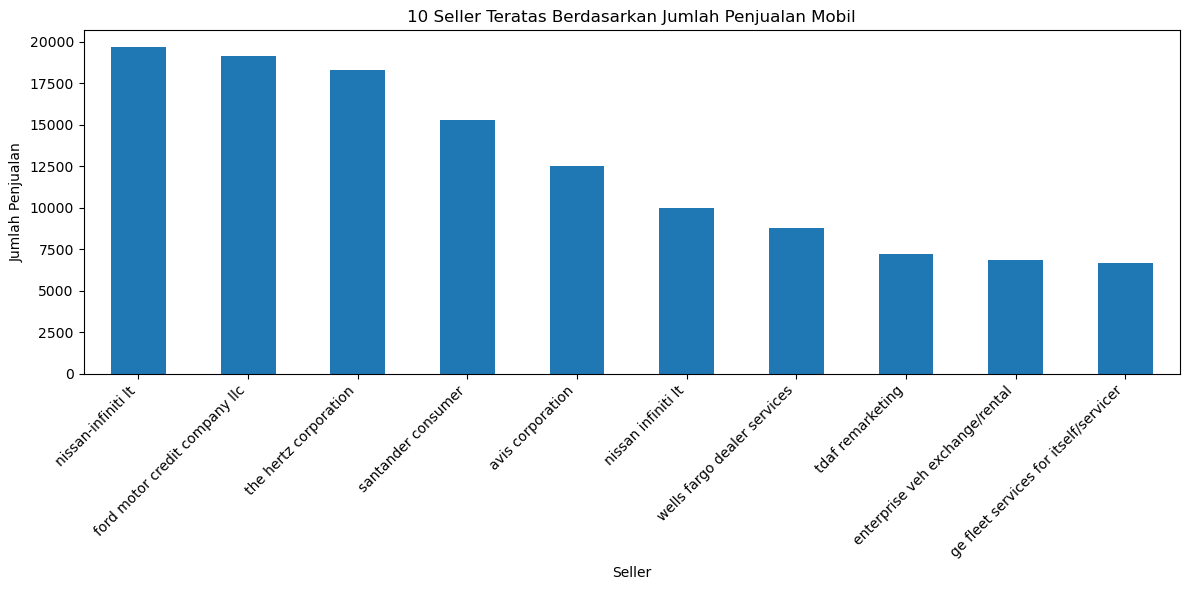

In [162]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
top_10_sellers.plot(kind='bar')
plt.title('10 Seller Teratas Berdasarkan Jumlah Penjualan Mobil')
plt.xlabel('Seller')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Insight : 
- Seller Nissan-Infinity LT dan Ford Motor Credit Company LLC menunjukkan jumlah penjualan yang sangat tinggi, seller lain seperti The Hertz Corporation dan Santander Consumer juga menunjukkan angka penjualan yang cukup tinggi, menunjukkan bahwa mereka juga berperan penting dalam pasar.
- Preferensi konsumen : Merek atau seller yang lebih dikenal atau memiliki reputasi baik cenderung memiliki penjualan yang lebih tinggi.
- Preferensi Seller yang lainnya : Seller dengan penjualan lebih rendah mungkin perlu mengevaluasi strategi pemasaran dan penjualan mereka untuk meningkatkan jumlah penjualan. Ini bisa meliputi promosi, peningkatan layanan pelanggan, atau penawaran produk yang lebih menarik.

### Why (Mengapa)

Key Question 5 : Mengapa Harga Mobil Bervariasi Berdasarkan Fitur Tertentu?

Penjelasan : kita akan membuat heatmap correlation, yaitu mencari korelasi harga mobil dengan fitur-fitur seperti tahun keluaran, odometer, dan mmr.

In [181]:
# membuat numerical colomns
numerical_cols = ['sellingprice', 'mmr', 'odometer', 'year']

# kalkulasikan dengan korelasi matrix
correlation_matrix = df[numerical_cols].corr()

# print
print(correlation_matrix)

              sellingprice       mmr  odometer      year
sellingprice      1.000000  0.983604 -0.599411  0.607738
mmr               0.983604  1.000000 -0.606665  0.619243
odometer         -0.599411 -0.606665  1.000000 -0.772229
year              0.607738  0.619243 -0.772229  1.000000


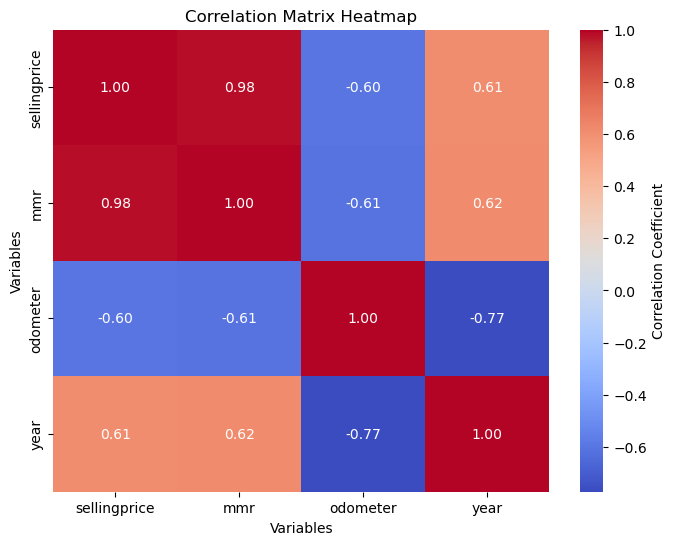

In [182]:
# membuat figut
plt.figure(figsize=(8, 6))

# membuat heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})

# Membuat judul
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')

# tampilkan plot
plt.show()


Interpretasi : 

a.  interpretasi positif
- sellingprice dan mmr: Terdapat korelasi yang sangat kuat (0.98), menunjukkan bahwa semakin tinggi nilai pasar mobil, semakin tinggi pula harga jualnya.
- sellingprice dan year: Korelasi positif (0.64) menunjukkan bahwa mobil yang lebih baru cenderung memiliki harga jual yang lebih tinggi.

b. interpretasi negatif
- sellingprice dan odometer: Korelasi negatif (-0.61) menunjukkan bahwa semakin tinggi jarak tempuh mobil, harga jualnya cenderung lebih rendah.
- odometer dan year: Korelasi negatif yang kuat (-0.74) menunjukkan bahwa mobil yang lebih tua cenderung memiliki jarak tempuh yang lebih tinggi.


### How (Bagaimana)

Key Question 6 : Bagaimana perbedaan rata-rata harga mobil dengan perbandingan transmisi automatic dan manual ?


Penjelasan : sebagai referensi untuk konsumen perbandingan harga matic dan manual

C:\Users\User\AppData\Local\Temp\ipykernel_3020\3029960915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='transmission', y='sellingprice', data=average_selling_price, palette='viridis')


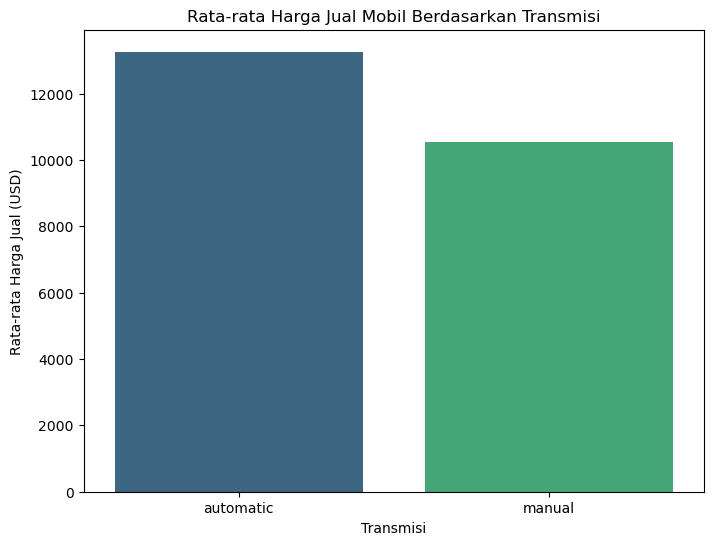

  transmission  sellingprice
0    automatic  13263.614910
1       manual  10553.769097


In [183]:
automatic_cars = df[df['transmission'] == 'automatic']
manual_cars = df[df['transmission'] == 'manual']

# membuat rata-rata harga penjualan
average_selling_price = df.groupby('transmission')['sellingprice'].mean().reset_index()

# membuat diagram bar
plt.figure(figsize=(8, 6))
sns.barplot(x='transmission', y='sellingprice', data=average_selling_price, palette='viridis')

# membuat judul dan label
plt.title('Rata-rata Harga Jual Mobil Berdasarkan Transmisi')
plt.xlabel('Transmisi')
plt.ylabel('Rata-rata Harga Jual (USD)')

# menunjukkan chart
plt.show()

# Print average selling prices
print(average_selling_price)

Insight :
- Mobil dengan transmisi otomatis memiliki rata-rata harga jual yang lebih tinggi dibandingkan dengan mobil dengan transmisi manual.
- Sebaliknya, Mobil dengan transmisi manual memiliki rata-rata harga jual yang lebih rendah dibandingkan dengan mobil dengan transmisi otomatis.


# 5. Conclusion and Recomendation

## 5.1 Conclusion

Dari dataset tersebut dapat dianalisa bahwa, pasar mobil dengan harga yang terjangkau masih mendominasi di pasaran. Probabilitas konsumen banyak membeli dengan harga terjangkau yaitu penggunaannya hanya untuk kebutuhan sehari-harinya saja. Salah satu alasan konsumen membeli mobil dengan harga terjangkau juga dapat dilihat dari trend harga mobil, mobil dengan umur yang lebih lama dan memiliki odometer yang cenderung panjang juga menentukan harga mobil menjadi lebih murah, tentunya harga mobil berkorelasi dengan nilai pasar yang baik. Rekomendasi pemilihan transmisi apabila ingin harga yang terjangkau, bisa mengambil transmisi manual, karena menurut data harga jual transmisi automatic lebih tinggi dibandingkan dengan transmisi manual.

Kemudian brand yang menjadi andalan adalah brand "Ford" dan "Chevrolet" sebagai brand yang memiliki penjualan yang sangat tinggi dibandingkan dengan brand lainnya, serta seller yang menjadi andalan bagi konsumen salah satunya adalah "Ford Motor Credit Company LLC" yang menunjukkan salah satu seller terbaik berdasarkan tingkat penjualannya.

## 5.2 Recomendation

Berdasarkan konklusi yang telah didapat, apabila saya menjadi seller dan hendak menjajakan mobil. Saya akan menawarkan kepada anda Mobil dengan brand 'Ford' yang bertransmisi 'otomatis', memiliki 'tahun' yang agak sedikit lama dan 'odometer' yang tidak terlalu jauh, agar anda bisa mendapatkan dengan harga dibawah 50.000 USD. Untuk penawaran lebih menarik, anda bisa datang ke seller 'Ford Motor Credit Company LLC'.

# 6. Export Data

In [184]:
# export df ke file .csv
df.to_csv('car_prices_clean.csv', index=False)